In [1]:
# toc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

# ML contents
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# from sklearn.tree import plot_tree

from IPython.display import Markdown

plt.style.use(f'../maroon_ipynb.mplstyle')

def display_table(df, index=False):
    markdown_str = df.to_markdown(index=index)
    display(Markdown(markdown_str))

# Problem 1
The included csv file contains information about the naturally occurring elements. The goal of this homework is to build a random forest model to predict the melting point of an element based on the other provided properties.

Split the database by setting aside 10% for testing and train a random forest model on the other 90% to predict the melting temperature. What is the root mean squared error of the model on the training dataset and the test dataset respectively? What inputs were most important for determining the melting point? Does this make physical sense?

## Solution

In [2]:
# Getting the data
data = pd.read_csv('periodic_table_data.csv')
# data.head()
display_table(data.head().transpose(), index=True)

|                   |         0 |          1 |         2 |         3 |        4 |
|:------------------|----------:|-----------:|----------:|----------:|---------:|
| AtomicNumber      |  1        |   2        |    3      |    4      |    5     |
| AtomicMass        |  1.007    |   4.002    |    6.941  |    9.012  |   10.811 |
| Period            |  1        |   1        |    2      |    2      |    2     |
| Group             |  1        |  18        |    1      |    2      |   13     |
| AtomicRadius      |  0.79     |   0.49     |    2.1    |    1.4    |    1.2   |
| Electronegativity |  2.2      | nan        |    0.98   |    1.57   |    2.04  |
| FirstIonization   | 13.5984   |  24.5874   |    5.3917 |    9.3227 |    8.298 |
| Density           |  8.99e-05 |   0.000179 |    0.534  |    1.85   |    2.34  |
| MeltingPoint      | 14.175    |   0.95     |  453.85   | 1560.15   | 2573.15  |
| BoilingPoint      | 20.28     |   4.22     | 1615      | 2742      | 4200     |
| SpecificHeat      | 14.304    |   5.193    |    3.582  |    1.825  |    1.026 |
| NumberofShells    |  1        |   1        |    2      |    2      |    2     |

In [3]:
# Splitting the data
feature_data = data.drop(columns=['MeltingPoint'])
target_data = data['MeltingPoint']

X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.1, random_state=12)

**Explanation of the code above:**

We split the data into the feature and target parts, then used the `train_test_split` function to split the data into the training and testing datasets. The `test_size` parameter is set to 0.1, which means that 10% of the data will be used for testing, and the rest will be used for training. The `random_state` parameter is set to 12 to ensure reproducibility.

In [4]:
# Training the model
model = RandomForestRegressor(n_estimators=10, random_state=12)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

# Calculating the root mean squared error
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
float(test_rmse)  # Root-mean-square error on the test dataset

166.95986112082284

In [5]:
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
float(train_rmse)  # Root-mean-square error on the training dataset

98.67015606609053

In [6]:
# Getting the plot of the tree
# fig, ax = plt.subplots(figsize=(20, 10), dpi=1000)
# tree0 = model.estimators_[0]
# plot_tree(tree0, filled=True, feature_names=feature_data.columns, ax=ax)
# fig.savefig('tree0.png')
# plt.show()

We would like to know which features are most important for determining the melting point. We can use the `feature_importances_` metric to determine the features that had more impact.

In [7]:
importances = model.feature_importances_  # Returns the "Gini" importance
feature_names = feature_data.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)
# feature_importance_df
display_table(feature_importance_df)

| Feature           |   Importance |
|:------------------|-------------:|
| BoilingPoint      |  0.834165    |
| Electronegativity |  0.0459782   |
| FirstIonization   |  0.0347052   |
| Group             |  0.0286459   |
| SpecificHeat      |  0.0124494   |
| Density           |  0.0120639   |
| AtomicNumber      |  0.0109175   |
| AtomicRadius      |  0.010591    |
| AtomicMass        |  0.00814753  |
| Period            |  0.00175236  |
| NumberofShells    |  0.000584132 |

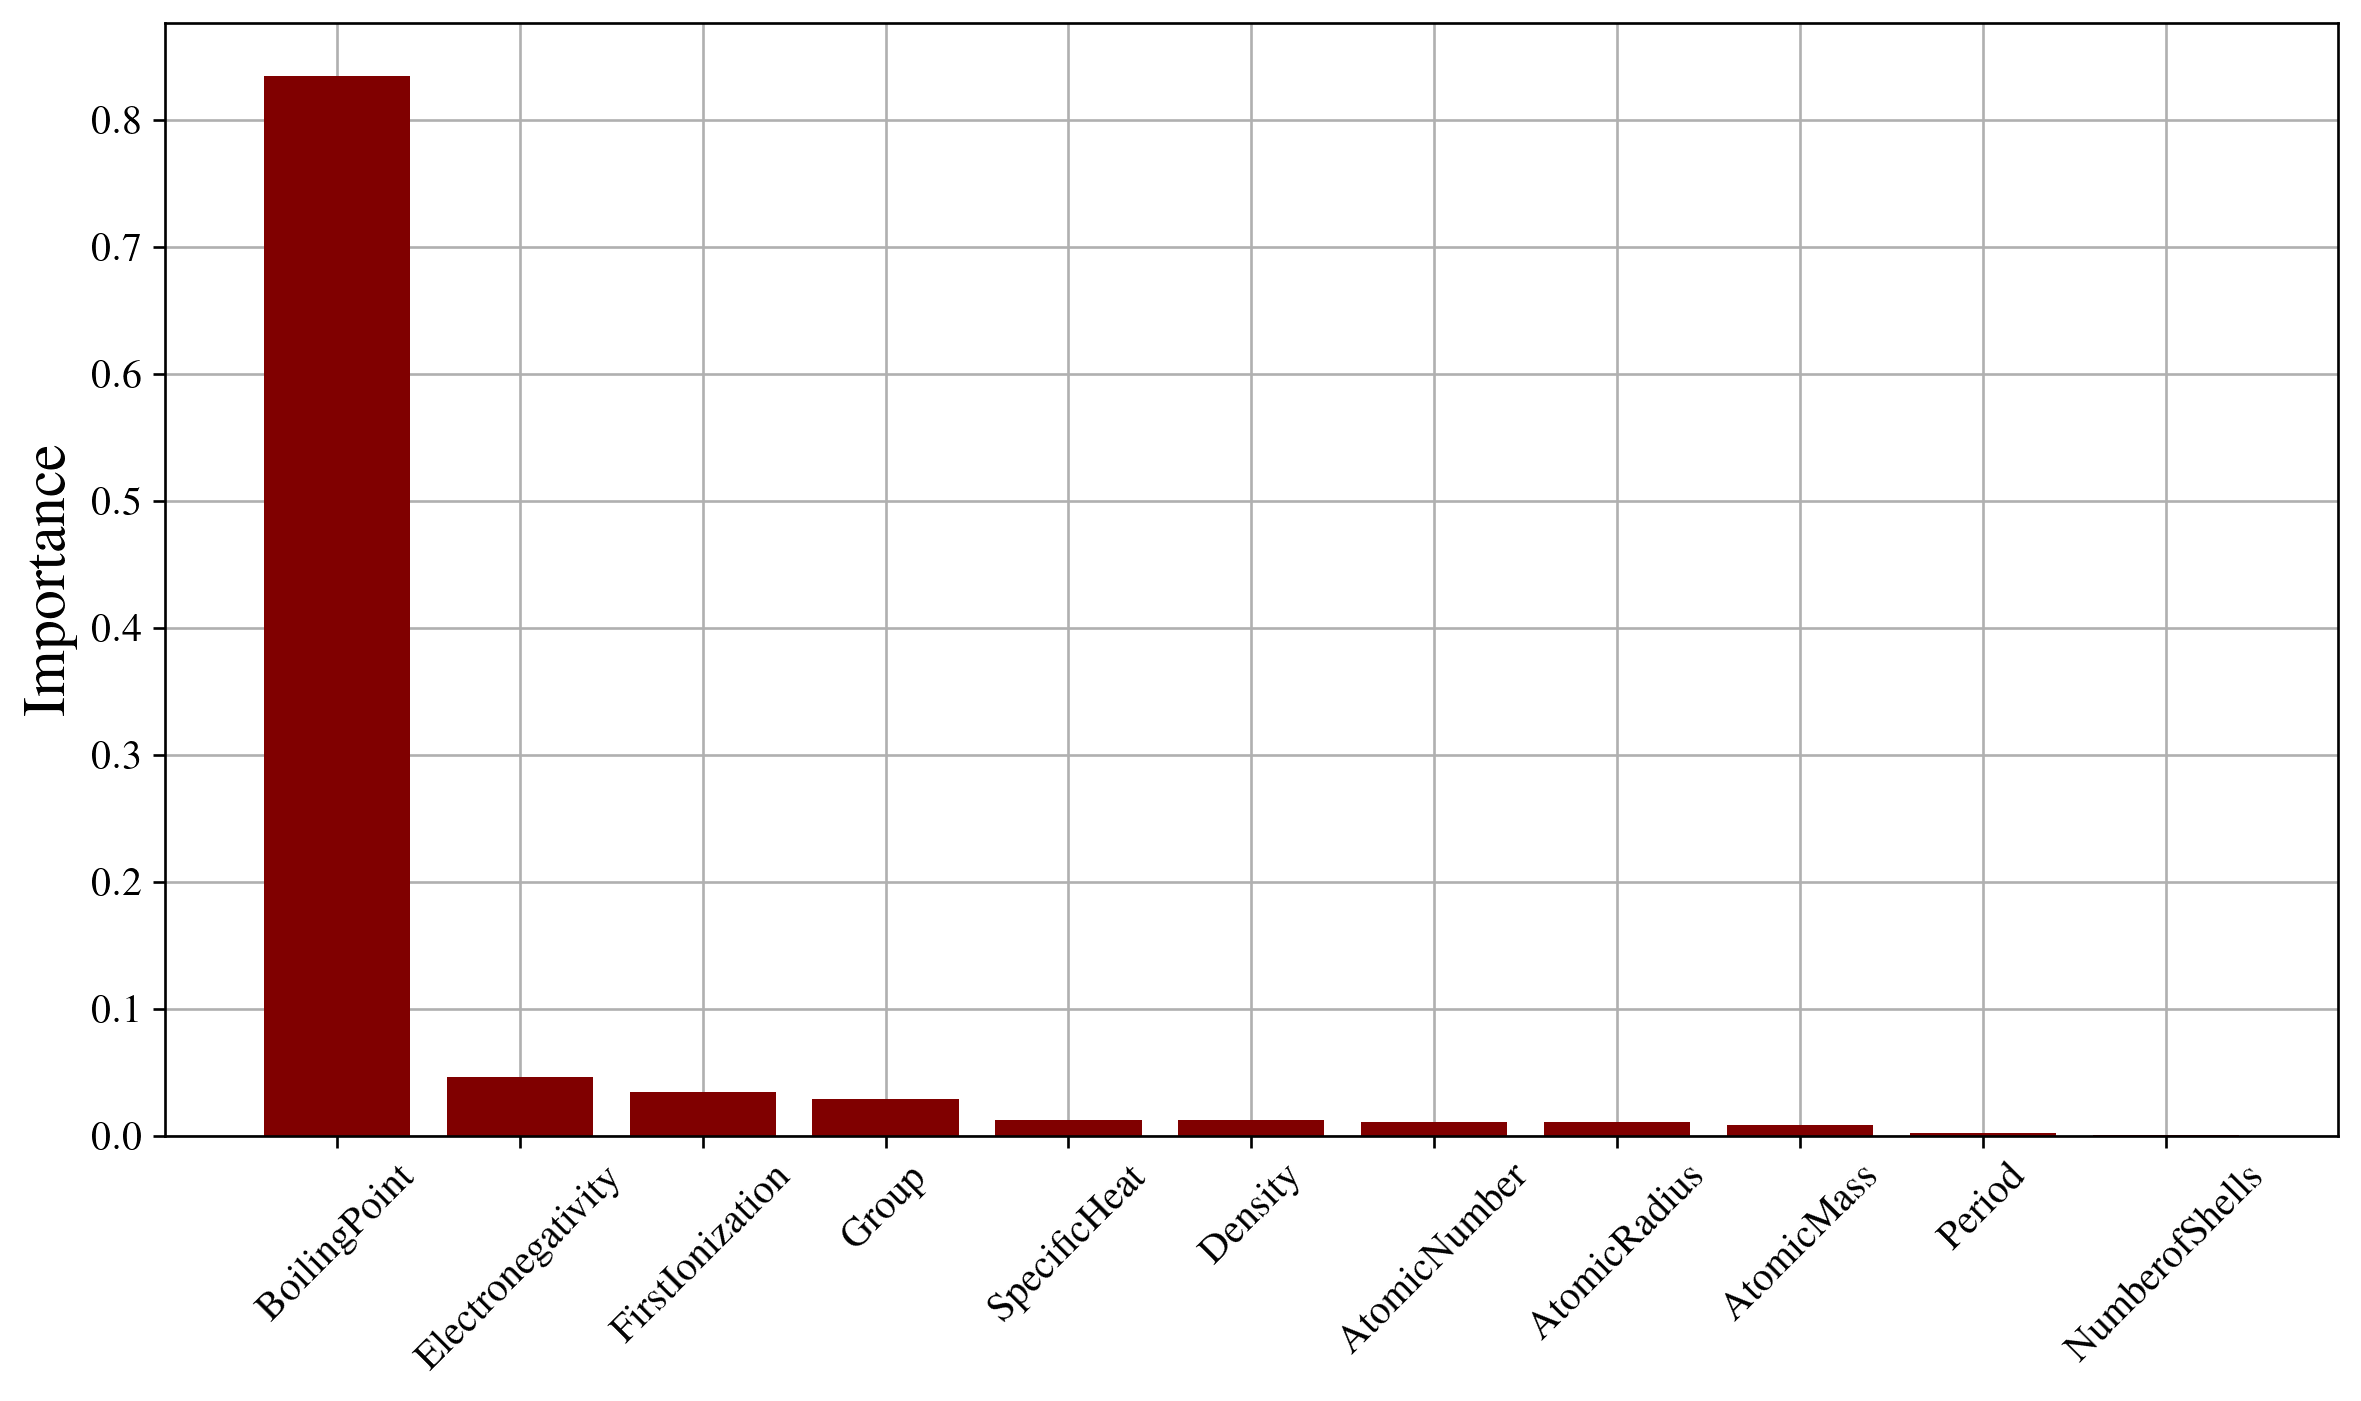

In [8]:
fig, ax = plt.subplots()
ax.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], zorder=2)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Importance')
plt.show()

The results show that the boiling point, electronegativity, and the first ionization have the highest effect on the model predicting the melting point. These results do physically make sense because the boiling point is closely related to the melting point. Generally, substances with a higher boiling point will also have higher melting points. Additionally, the electronegativity and first ionization characterize the bonding strength of the atom. This of course would affect the melting point.

# Problem 2
Generate a series of random forest models increasing the number of trees from 1 to 100. How do the training and test RMSE error vary as the number of trees changes? Plot your results. What trends to you see? Why do you see the trends that you do? What is the best number of trees to use? Why? (Note: you do not need to create a forest for every number between 1 and 100, but you will need to consider that the same number of trees might produce different results depending on the random seed).

## Solution

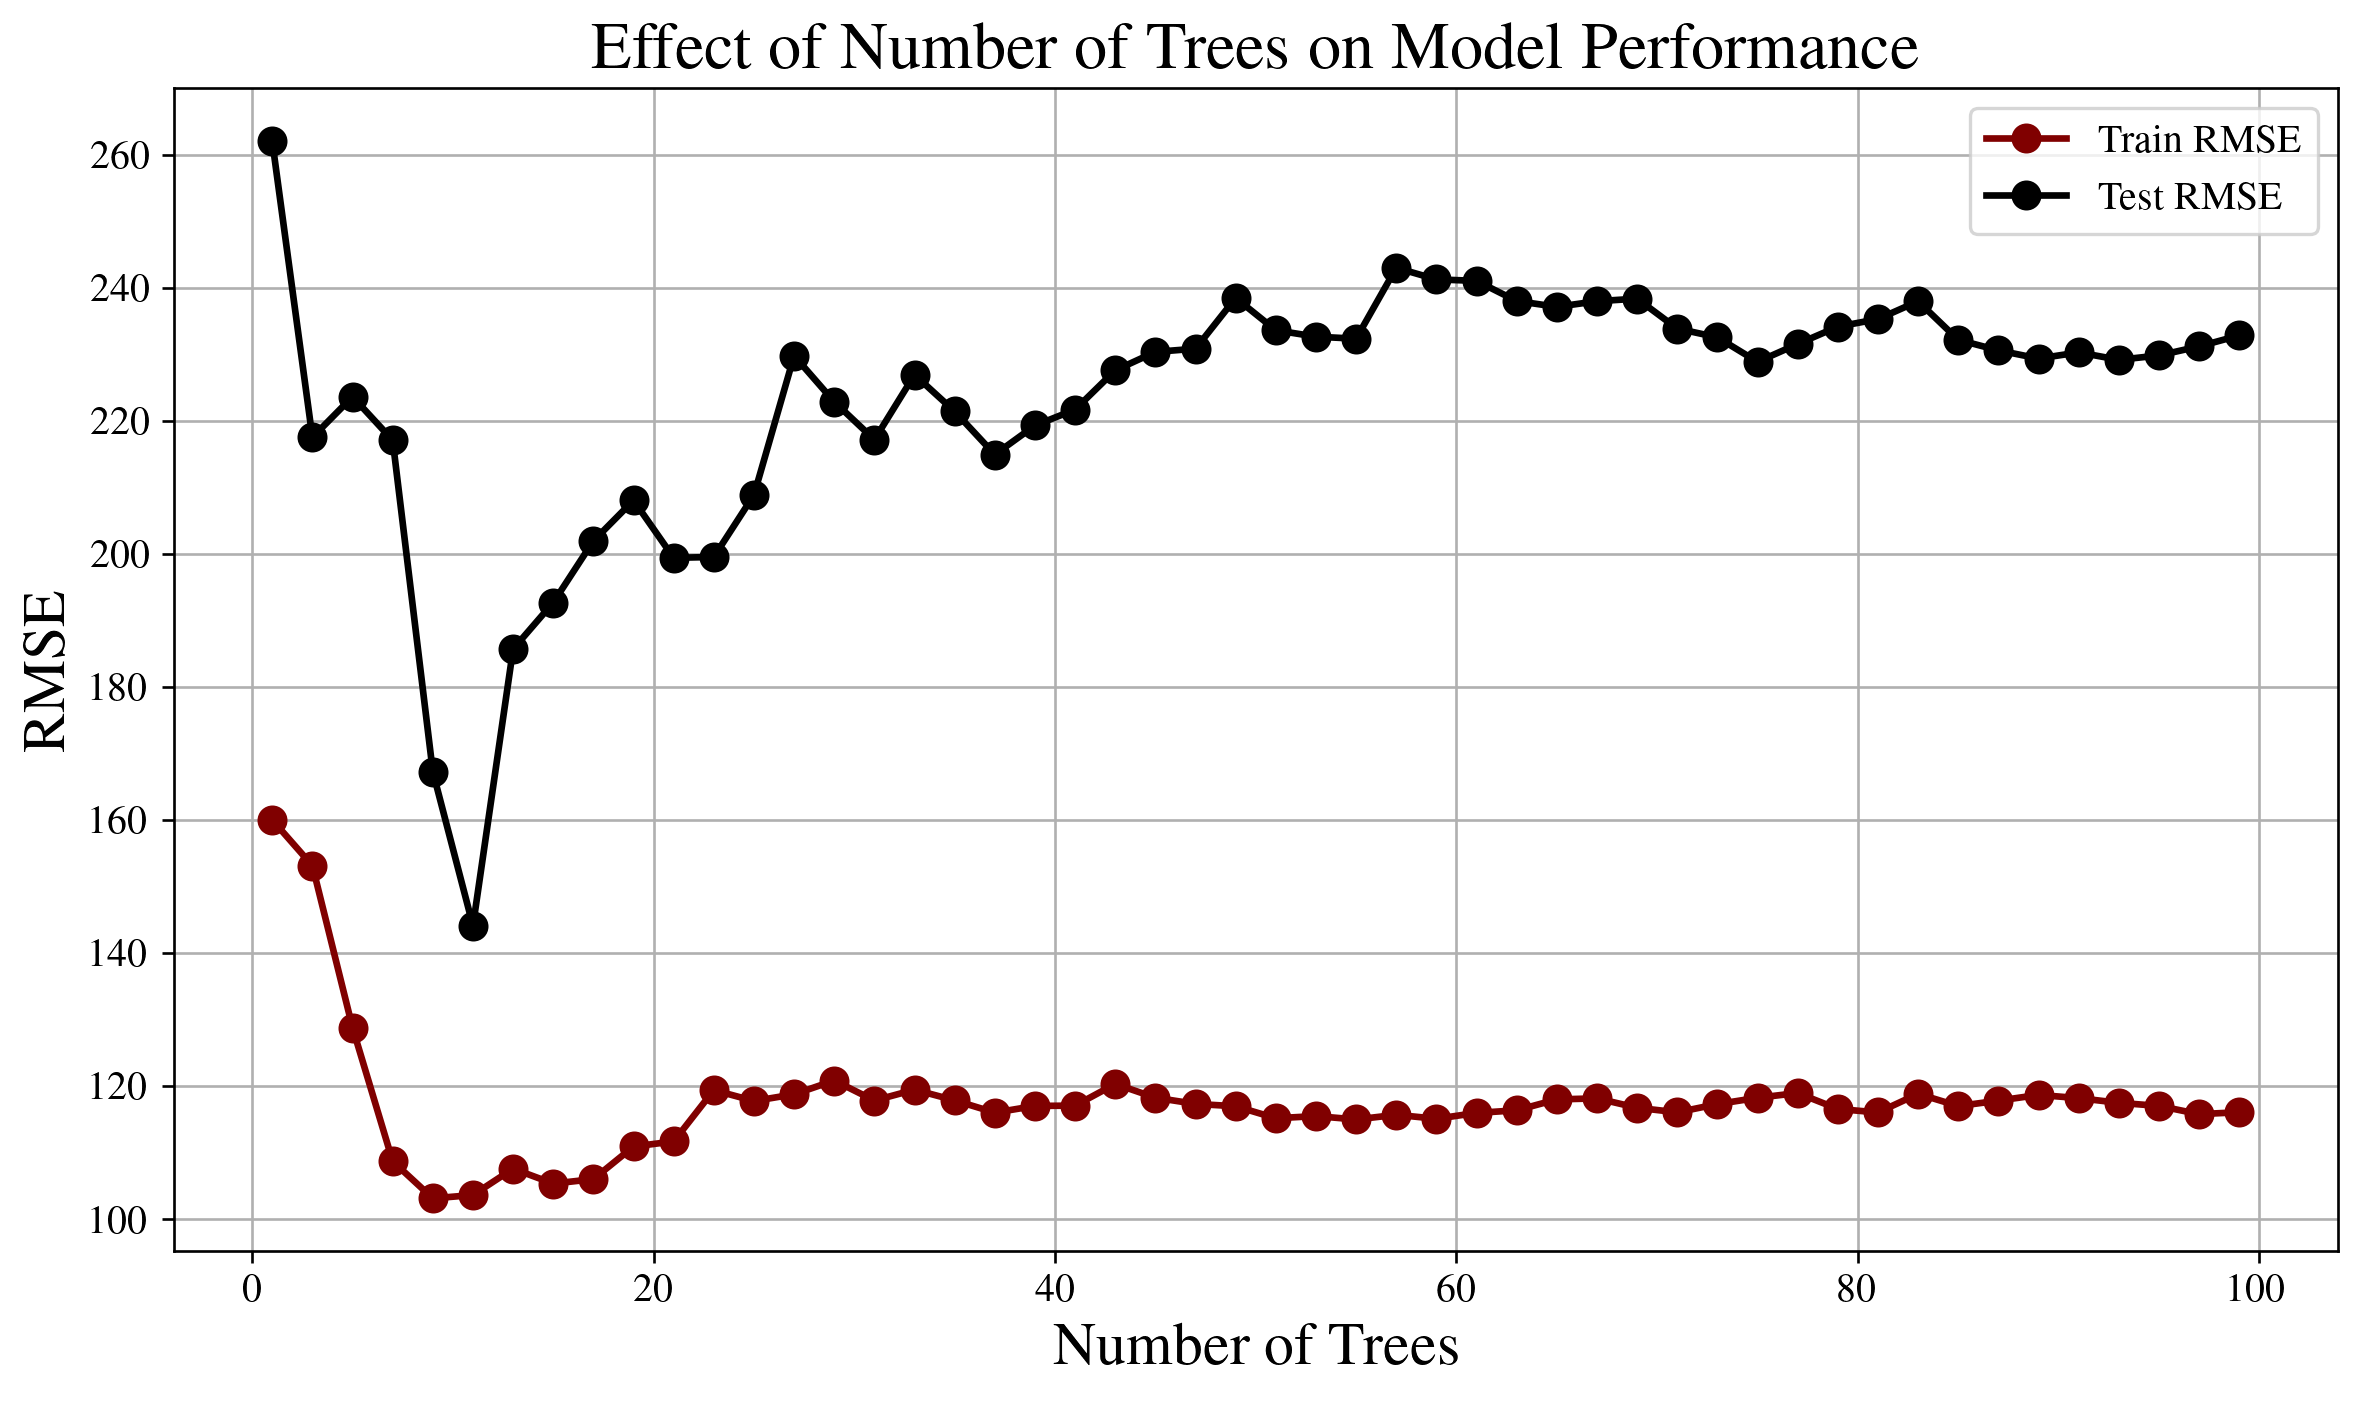

The best number of trees is 11 with a test RMSE of 144.106


In [9]:
# Varying the number of trees from 1 to 100 and tracking RMSE
tree_counts = list(range(1, 101, 2))
train_rmse_values = []
test_rmse_values = []

for n_trees in tree_counts:
    model = RandomForestRegressor(n_estimators=n_trees, random_state=12)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    train_rmse_values.append(train_rmse)
    test_rmse_values.append(test_rmse)

# Plot the results
fig, ax = plt.subplots()
ax.plot(tree_counts, train_rmse_values, label='Train RMSE', marker='o')
ax.plot(tree_counts, test_rmse_values, label='Test RMSE', marker='o')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('RMSE')
ax.set_title('Effect of Number of Trees on Model Performance')
ax.legend()
plt.grid(True)
plt.show()

# Find the best number of trees (based on lowest test RMSE)
best_n_trees = tree_counts[np.argmin(test_rmse_values)]
print(f"The best number of trees is {best_n_trees} with a test RMSE of {min(test_rmse_values):.3f}")

The results indicate that using between 8 and 12 trees generally yields the lowest test RMSE, striking a balance between bias and variance. Initially, as the number of trees increases, the test error decreases sharply due to variance reduction. However, after a certain point, additional trees provide diminishing returns, and the error stabilizes. This behavior reflects the bias-variance tradeoff observed in ensemble models, where increasing the number of trees reduces overfitting but does not necessarily improve generalization. The trend is similar to fitting a polynomial model to data, where adding complexity initially reduces bias but can eventually lead to diminishing improvements. A common heuristic suggests using a number of trees approximately equal to the number of features, which aligns with our results, as we have 11 features.

# Problem 3
For the optimum number of trees found in part 2, perform a similar study varying the maximum tree depth between 1 and 20. Plot your results, and explain the trends that you see. What is the optimal maximum depth to use?

## Solution

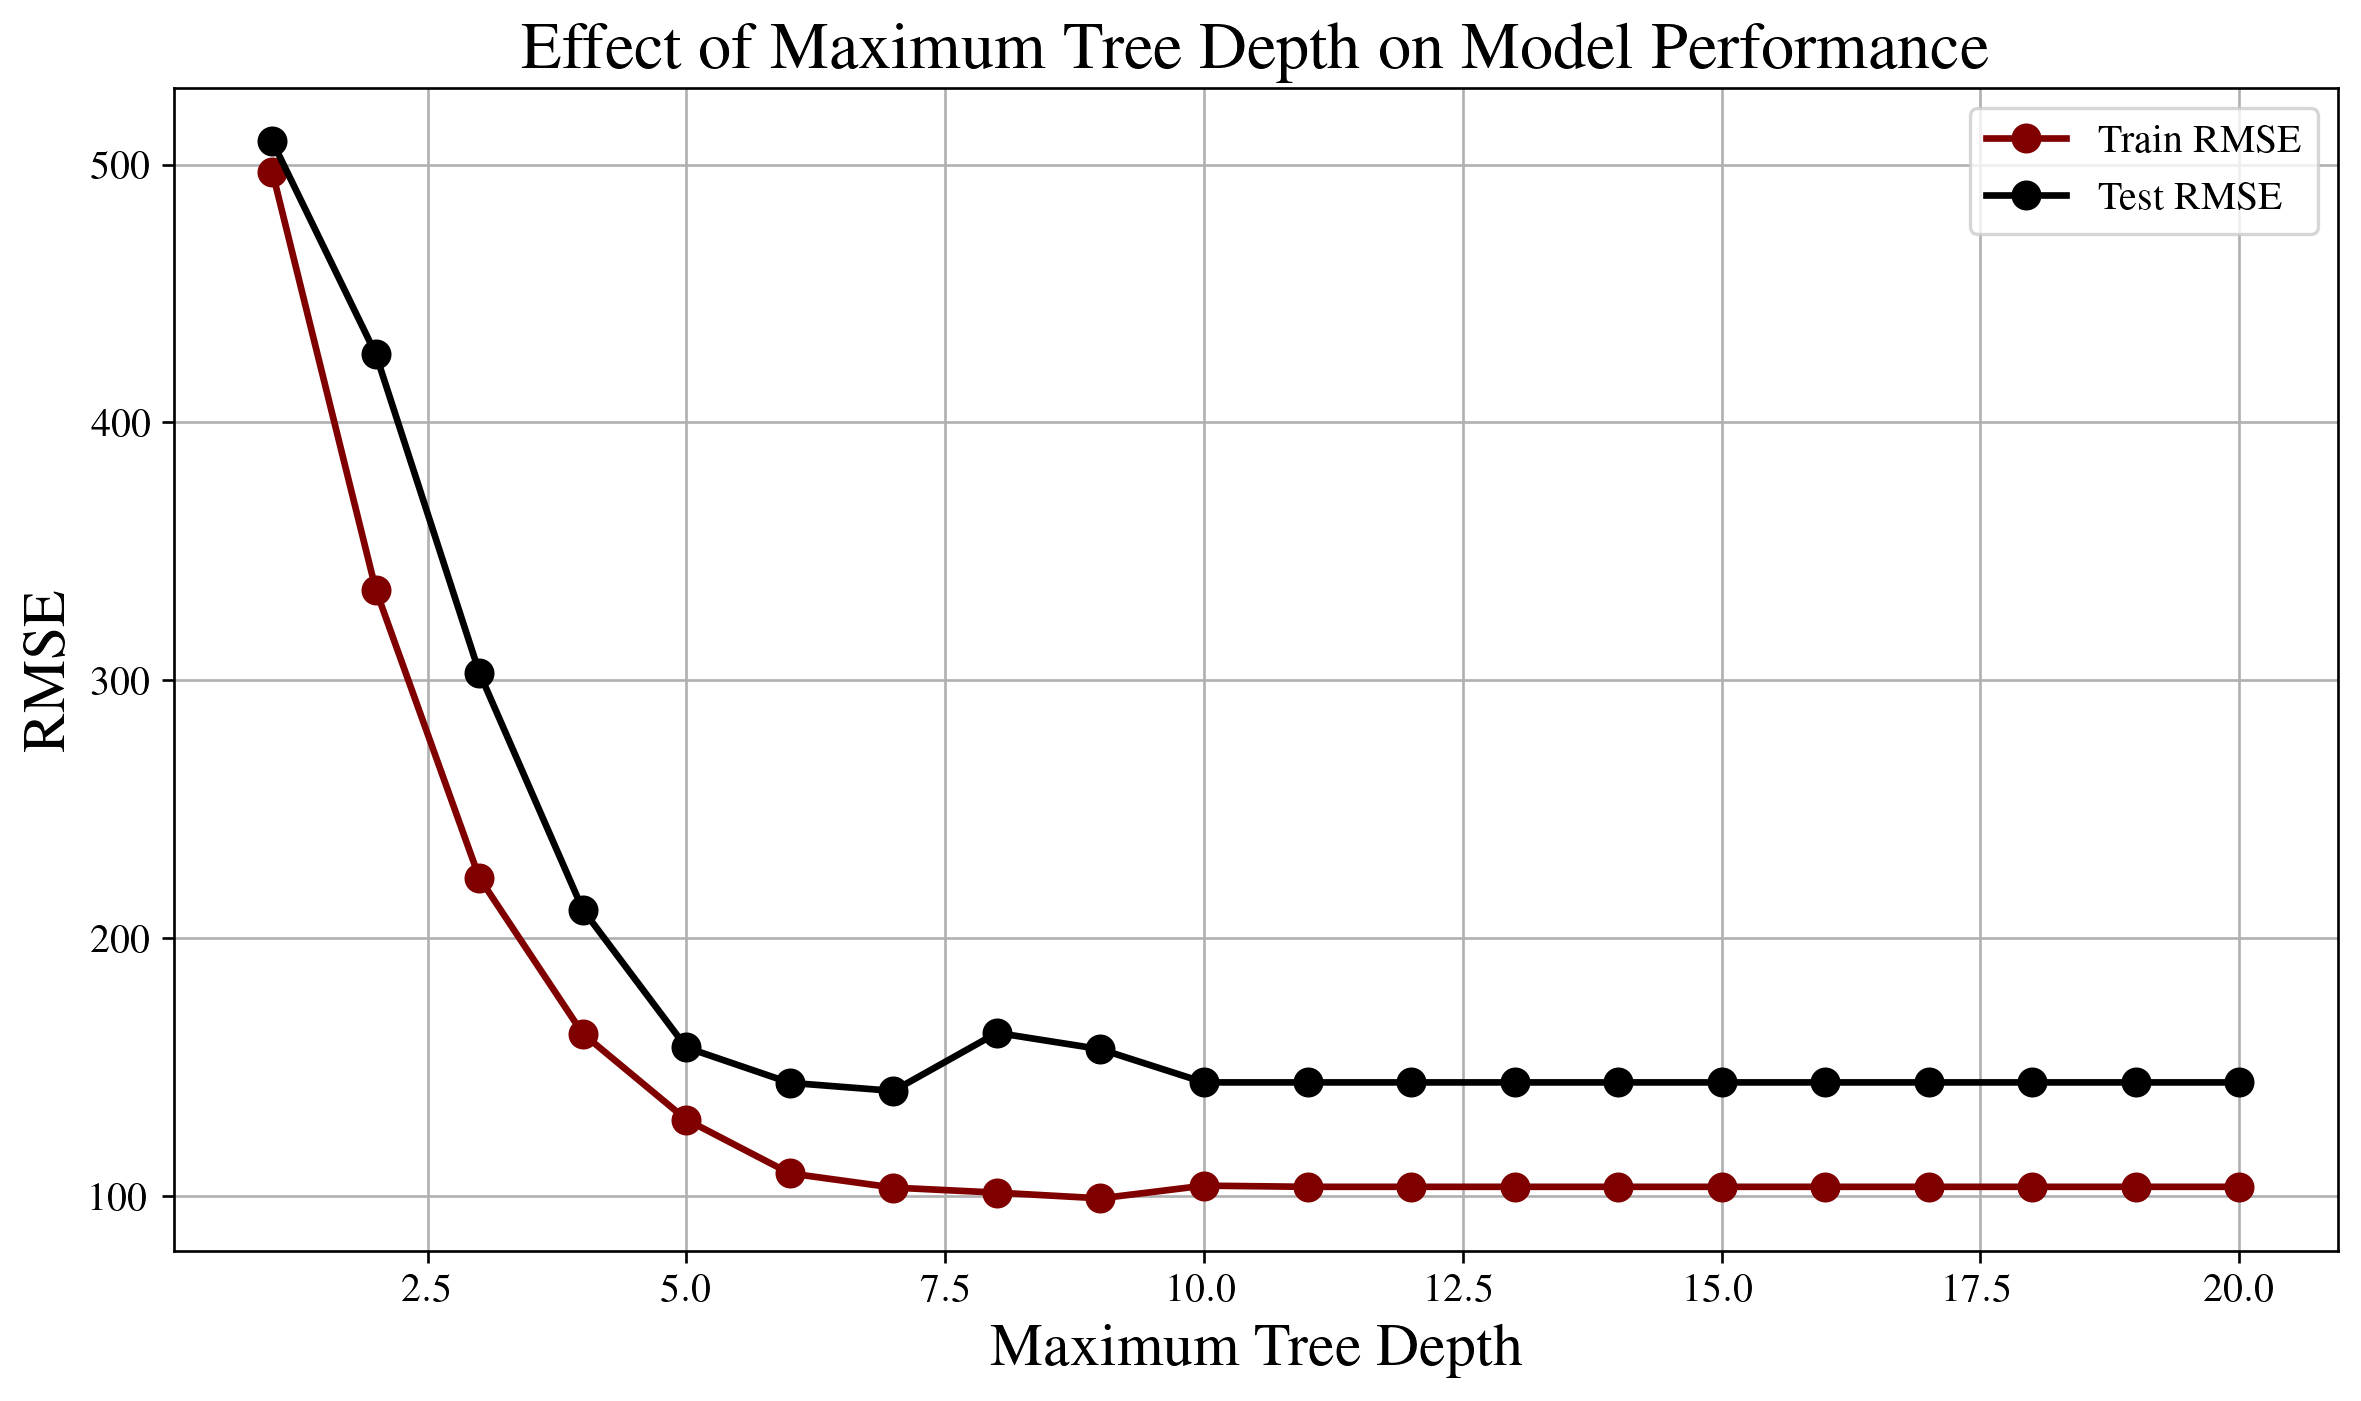

The optimal maximum depth is 7 with a test RMSE of 140.818


In [10]:
# Varying the maximum tree depth from 1 to 20 and tracking RMSE
max_depths = list(range(1, 21))
train_rmse_values = []
test_rmse_values = []

# Using the optimal number of trees from Problem 2
optimal_n_trees = best_n_trees

for depth in max_depths:
    model = RandomForestRegressor(n_estimators=optimal_n_trees, max_depth=depth, random_state=12)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    train_rmse_values.append(train_rmse)
    test_rmse_values.append(test_rmse)

# Plot the results
fig, ax = plt.subplots()
ax.plot(max_depths, train_rmse_values, label='Train RMSE', marker='o')
ax.plot(max_depths, test_rmse_values, label='Test RMSE', marker='o')
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('RMSE')
ax.set_title('Effect of Maximum Tree Depth on Model Performance')
ax.legend()
plt.grid(True)
plt.show()

# Find the optimal max depth based on lowest test RMSE
optimal_max_depth = max_depths[np.argmin(test_rmse_values)]
print(f"The optimal maximum depth is {optimal_max_depth} with a test RMSE of {min(test_rmse_values):.3f}")

The results indicate that the optimal maximum tree depth falls within the range of 7 to 10, where the test RMSE reaches its minimum value. Beyond a depth of 10, the test error stabilizes and does not change, suggesting that the model does not need to go further than a depth of 10 to get pure leaves.

# Problem 4
Use the `RandomizedSearchCV` function to explore the same space for number of trees and maximum tree depth (1-100 and 1-20 respectively). Use 5-fold cross validation. What parameters gave the best result? Do they agree with your results for parts 2 and 3?

## Solution

In [11]:
# Make a new blank random forest for the randomized search to work with
rf = RandomForestRegressor()

param_dist = {
    'n_estimators': randint(1, 100),
    'max_depth': randint(1, 20)
}
rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    cv=5,
)

rand_search.fit(X_train, y_train)
rand_search.best_params_

{'max_depth': 8, 'n_estimators': 32}

In [12]:
best_rf = rand_search.best_estimator_

y_pred_test = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)
float(np.sqrt(mean_squared_error(y_test, y_pred_test))), float(np.sqrt(mean_squared_error(y_train, y_pred_train)))

(250.9187096521354, 126.18397982284785)

The results vary above, but they do show consistency in the max depth being around 10. The number of estimators/trees varies from 12 to 60, but they show mean square errors that are somewhat close to that of problem 2 and 3. What's important is that the results from the best estimator align with the errors from problems 2 and 3.

# Problem 5
How did the train and test RMSE change between the initial random forest (part 1) and the optimized one? How significant is this improvement?

## Solution
For my case, the results did not substantially improve. Looking back at the results, my initial RMSE testing error was at 167, and the optimized one is around 144. The training error from problem 1 is around 100 and the optimized from problem 2 stays around the same. This is because I just happened to choose the 10 as the number of estimators in the first problem, which was closely aligned with the optimized value.

The default depth value from problem one is the depth required to get "pure leaves", or zero squared error at the end nodes. This means that the depth is pretty much already optimized by default. As we saw from problem 3, the depth converges very close to the minimum error for larger depth sizes.